In [1]:
import sys
sys.path.append("..")

%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from irt_lib.editorial_data_helper import create_full_data

from irt_lib.helpers import split_by_doc_id, do_metrics, run_full_cv

In [4]:
style_data = create_full_data(feature_types=['style_scaled'])

In [5]:
style_data.head()

,feats,user_id,label,doc_id
0,"[0.9675265502110052, -1.2649550896245798, 2.21...",3,True,1638699
1,"[0.5305433924314203, -1.0457320355012902, 1.96...",3,True,1640113
2,"[1.5755031175565148, 0.4355048166830996, -0.63...",3,False,1640630
3,"[0.036562431463193934, -1.393328950147228, -0....",3,True,1640915
4,"[0.9675265502110052, -1.2649550896245798, 2.21...",2,True,1638699


## User Prior Model

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import random

kf = KFold(n_splits=10, shuffle=True)
accs = []
for train_index, test_index in kf.split(style_data):
    train = style_data.iloc[train_index]
    test = style_data.iloc[test_index]
    
    priors = train.groupby('user_id').label.mean().to_dict()
    
    y_pred = test.user_id.map(lambda x: random.random() < priors.get(x))
    accs.append(accuracy_score(test.label, y_pred))

print("Average User Prior:", sum(accs) / len(accs))

Average User Prior: 0.6562835355607319


## Style Model

In [6]:
from lib.models import IRTNet

In [7]:
D_in = len(style_data.iloc[0].feats)
num_users = style_data.user_id.nunique()

In [8]:
model_arguments = {'D_in': D_in, 'num_users': num_users}
train_arguments = {'num_train_epochs': 200, 'learning_rate': 0.001}

In [9]:
model_cls = IRTNet

In [10]:
final_results = {}

In [11]:
for C in [1e-3, 1e-4, 1e-5, 1e-6]:
    for reg_type in ['l1', 'l2']:
        for learning_rate in [0.01, 0.005]:
            model_arguments['C'] = C
            model_arguments['reg_type'] = reg_type
            train_arguments['learning_rate'] = learning_rate
            train_arguments['num_train_epochs'] = 100
            results = run_full_cv(style_data, model_cls, model_arguments, train_arguments, averaged=True)
            
            final_results[(C, reg_type, learning_rate)] = results

***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Step,Training Loss
10000,0.572300
20000,0.557200
30000,0.546700
40000,0.535800
50000,0.524300


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.548729419708252, 'test_macro_f1': 0.6774964573808007, 'test_micro_f1': 0.745748299319728, 'test_pos_f1': 0.8258590564938846, 'test_accuracy': 0.7457482993197279, 'test_runtime': 0.37, 'test_samples_per_second': 3177.958, 'test_steps_per_second': 397.245}


Step,Training Loss


KeyboardInterrupt: 

In [12]:
results

{'test_loss': 0.548729419708252,
 'test_macro_f1': 0.6774964573808007,
 'test_micro_f1': 0.745748299319728,
 'test_pos_f1': 0.8258590564938846,
 'test_accuracy': 0.7457482993197279,
 'test_runtime': 0.37,
 'test_samples_per_second': 3177.958,
 'test_steps_per_second': 397.245}

In [85]:
import pickle
pickle.dump(final_results, open('style_scaled_cv_results.pkl', 'wb'))

## Just Text

In [ ]:
data = create_full_data(feature_types=['text_lemma_bin'])

In [ ]:
for C in [1e-3, 1e-4, 1e-5, 1e-6]:
    for reg_type in ['l1', 'l2']:
        for learning_rate in [0.01, 0.005]:
            model_arguments['C'] = C
            model_arguments['reg_type'] = reg_type
            train_arguments['learning_rate'] = learning_rate
            train_arguments['num_train_epochs'] = 100
            results = run_full_cv(style_data, model_cls, model_arguments, train_arguments, averaged=True)
            
            final_results[(C, reg_type, learning_rate)] = results

## Style + Text Model

In [28]:
data = create_full_data(feature_types=['style_scaled', 'text_lemma_bin'])

In [ ]:
final_results = {}

In [ ]:
for C in [1e-3, 1e-4, 1e-5, 1e-6]:
    for reg_type in ['l1', 'l2']:
        for learning_rate in [0.01, 0.005]:
            model_arguments['C'] = C
            model_arguments['reg_type'] = reg_type
            train_arguments['learning_rate'] = learning_rate
            train_arguments['num_train_epochs'] = 100
            results = run_full_cv(style_data, model_cls, model_arguments, train_arguments, averaged=True)
            
            final_results[(C, reg_type, learning_rate)] = results

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Step,Training Loss
10000,0.573100
20000,0.559900
30000,0.548800
40000,0.537900
50000,0.526400


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5318859815597534, 'test_macro_f1': 0.6913175569815126, 'test_micro_f1': 0.7542517006802723, 'test_pos_f1': 0.8306971294669011, 'test_accuracy': 0.7542517006802721, 'test_runtime': 0.3716, 'test_samples_per_second': 3164.771, 'test_steps_per_second': 395.596}


Step,Training Loss
10000,0.543800
20000,0.532000
30000,0.525600
40000,0.521100
50000,0.514700


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5549741387367249, 'test_macro_f1': 0.6776125993523698, 'test_micro_f1': 0.7465986394557823, 'test_pos_f1': 0.8267441860465117, 'test_accuracy': 0.7465986394557823, 'test_runtime': 0.3716, 'test_samples_per_second': 3164.988, 'test_steps_per_second': 395.624}


Step,Training Loss
10000,0.542700
20000,0.528200
30000,0.516100
40000,0.506500
50000,0.494600


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5408536195755005, 'test_macro_f1': 0.6759811616954474, 'test_micro_f1': 0.7440476190476191, 'test_pos_f1': 0.8244897959183672, 'test_accuracy': 0.7440476190476191, 'test_runtime': 0.3715, 'test_samples_per_second': 3165.222, 'test_steps_per_second': 395.653}


Step,Training Loss
10000,0.517400
20000,0.504100
30000,0.497500
40000,0.492900
50000,0.486400


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5402262210845947, 'test_macro_f1': 0.6781341107871719, 'test_micro_f1': 0.745748299319728, 'test_pos_f1': 0.8256559766763848, 'test_accuracy': 0.7457482993197279, 'test_runtime': 0.3692, 'test_samples_per_second': 3185.683, 'test_steps_per_second': 398.21}


Step,Training Loss
10000,0.537200
20000,0.522200
30000,0.510000
40000,0.500300
50000,0.488400


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5384057760238647, 'test_macro_f1': 0.6773756963673674, 'test_micro_f1': 0.7448979591836735, 'test_pos_f1': 0.824970828471412, 'test_accuracy': 0.7448979591836735, 'test_runtime': 0.3698, 'test_samples_per_second': 3179.748, 'test_steps_per_second': 397.469}


Step,Training Loss
10000,0.512100
20000,0.498100
30000,0.491400
40000,0.486700
50000,0.480200


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5377528667449951, 'test_macro_f1': 0.6758615654205608, 'test_micro_f1': 0.7431972789115646, 'test_pos_f1': 0.8235981308411214, 'test_accuracy': 0.7431972789115646, 'test_runtime': 0.3733, 'test_samples_per_second': 3150.701, 'test_steps_per_second': 393.838}


Step,Training Loss
10000,0.534000
20000,0.518800
30000,0.506400
40000,0.496600
50000,0.484700


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5372947454452515, 'test_macro_f1': 0.6744694671238171, 'test_micro_f1': 0.7423469387755102, 'test_pos_f1': 0.8231173380035026, 'test_accuracy': 0.7423469387755102, 'test_runtime': 0.375, 'test_samples_per_second': 3136.299, 'test_steps_per_second': 392.037}


Step,Training Loss
10000,0.509000
20000,0.494700
30000,0.487800
40000,0.483100
50000,0.476600


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5365754961967468, 'test_macro_f1': 0.6758615654205608, 'test_micro_f1': 0.7431972789115646, 'test_pos_f1': 0.8235981308411214, 'test_accuracy': 0.7431972789115646, 'test_runtime': 0.3702, 'test_samples_per_second': 3176.824, 'test_steps_per_second': 397.103}


Step,Training Loss
10000,0.533300
20000,0.518000
30000,0.505600
40000,0.495900
50000,0.483900


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


Finished round {'test_loss': 0.5372939109802246, 'test_macro_f1': 0.673714953271028, 'test_micro_f1': 0.7414965986394558, 'test_pos_f1': 0.822429906542056, 'test_accuracy': 0.7414965986394558, 'test_runtime': 0.3683, 'test_samples_per_second': 3192.878, 'test_steps_per_second': 399.11}


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Step,Training Loss
10000,0.508400
20000,0.493900
30000,0.487100
40000,0.482400
50000,0.475900


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5365563631057739, 'test_macro_f1': 0.6758615654205608, 'test_micro_f1': 0.7431972789115646, 'test_pos_f1': 0.8235981308411214, 'test_accuracy': 0.7431972789115646, 'test_runtime': 0.3757, 'test_samples_per_second': 3130.495, 'test_steps_per_second': 391.312}


Step,Training Loss
10000,0.533000
20000,0.517700
30000,0.505300
40000,0.495500
50000,0.483500


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5372176766395569, 'test_macro_f1': 0.6729613193879012, 'test_micro_f1': 0.7406462585034015, 'test_pos_f1': 0.8217416715371128, 'test_accuracy': 0.7406462585034014, 'test_runtime': 0.3675, 'test_samples_per_second': 3199.958, 'test_steps_per_second': 399.995}


Step,Training Loss
10000,0.508100
20000,0.493600
30000,0.486700
40000,0.482000
50000,0.475500


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5364736318588257, 'test_macro_f1': 0.6751058353263412, 'test_micro_f1': 0.7423469387755102, 'test_pos_f1': 0.8229105786090006, 'test_accuracy': 0.7423469387755102, 'test_runtime': 0.3684, 'test_samples_per_second': 3191.95, 'test_steps_per_second': 398.994}


Step,Training Loss
10000,0.532900
20000,0.517600
30000,0.505200
40000,0.495400
50000,0.483400


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-50000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


Training completed. Do not forget to share your model on huggingface.co/models =)


***** Running Prediction *****
  Num examples = 1176
  Batch size = 8


PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 4698
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 58800


Finished round {'test_loss': 0.5372108817100525, 'test_macro_f1': 0.6729613193879012, 'test_micro_f1': 0.7406462585034015, 'test_pos_f1': 0.8217416715371128, 'test_accuracy': 0.7406462585034014, 'test_runtime': 0.3778, 'test_samples_per_second': 3112.544, 'test_steps_per_second': 389.068}


Step,Training Loss
10000,0.508000
20000,0.493500
30000,0.486600
40000,0.481900


Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-10000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-20000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-30000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to /home/ec2-user/temp_cv_path/checkpoint-40000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.


In [30]:
final_results

{(0.001, 'l1', 0.01): {'test_loss': 0.5318859815597534,
  'test_macro_f1': 0.6913175569815126,
  'test_micro_f1': 0.7542517006802723,
  'test_pos_f1': 0.8306971294669011,
  'test_accuracy': 0.7542517006802721,
  'test_runtime': 0.3716,
  'test_samples_per_second': 3164.771,
  'test_steps_per_second': 395.596},
 (0.001, 'l1', 0.005): {'test_loss': 0.5549741387367249,
  'test_macro_f1': 0.6776125993523698,
  'test_micro_f1': 0.7465986394557823,
  'test_pos_f1': 0.8267441860465117,
  'test_accuracy': 0.7465986394557823,
  'test_runtime': 0.3716,
  'test_samples_per_second': 3164.988,
  'test_steps_per_second': 395.624},
 (0.001, 'l2', 0.01): {'test_loss': 0.5408536195755005,
  'test_macro_f1': 0.6759811616954474,
  'test_micro_f1': 0.7440476190476191,
  'test_pos_f1': 0.8244897959183672,
  'test_accuracy': 0.7440476190476191,
  'test_runtime': 0.3715,
  'test_samples_per_second': 3165.222,
  'test_steps_per_second': 395.653},
 (0.001, 'l2', 0.005): {'test_loss': 0.5402262210845947,
  'tes

## Single Run for Audience Embeddings

Use all data during training to generate the best embeddings.

In [37]:
data = create_full_data(feature_types=['style_scaled', 'text_lemma_bin'])

In [80]:
from transformers import Trainer, TrainingArguments

D_in = len(data.iloc[0].feats)
num_users = data.user_id.nunique()
model_arguments = {'D_in': D_in, 'num_users': num_users, 'C': 1e-4, 'reg_type': 'l1'}

model = IRTNet(**model_arguments)
args = TrainingArguments(num_train_epochs=100, output_dir="../../../../tmp", learning_rate=0.005, disable_tqdm=False, logging_steps=1000)

data2 = data.to_dict(orient='records')

trainer = Trainer(model=model, train_dataset=data2, args=args, eval_dataset=data2)
trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
***** Running training *****
  Num examples = 5874
  Num Epochs = 100
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 73500


Step,Training Loss
1000,0.747200
2000,0.692300
3000,0.651200
4000,0.670000
5000,0.652400
6000,0.644600
7000,0.648900
8000,0.656800
9000,0.640000
10000,0.652300


Saving model checkpoint to ../../../../tmp/checkpoint-500
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to ../../../../tmp/checkpoint-1000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to ../../../../tmp/checkpoint-1500
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to ../../../../tmp/checkpoint-2000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to ../../../../tmp/checkpoint-2500
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to ../../../../tmp/checkpoint-3000
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to ../../../../tmp/checkpoint-3500
Trainer.model is not a `PreTrainedModel`, only saving its state dict.
Saving model checkpoint to ../../../../tmp/checkpoint-4000
Trainer.model is not a `PreTrainedModel

TrainOutput(global_step=73500, training_loss=0.5384577696923496, metrics={'train_runtime': 416.7262, 'train_samples_per_second': 1409.559, 'train_steps_per_second': 176.375, 'total_flos': 0.0, 'train_loss': 0.5384577696923496, 'epoch': 100.0})

In [75]:
user_info = pd.read_csv('corpus-webis-editorial-quality-18_annotators-personality-traits.csv')

In [81]:

W = model.users.weight.detach().cpu().numpy().T[0]


In [82]:
user_info['model_embed'] = W

In [83]:
user_info.corr()

,extraversion_num,agreeableness_num,conscientiousness_num,neuroticism_num,openness_num,model_embed
extraversion_num,1.000000,0.443956,0.108848,-0.624504,0.542754,-0.559358
agreeableness_num,0.443956,1.000000,0.552674,-0.778170,0.244179,-0.198169
conscientiousness_num,0.108848,0.552674,1.000000,-0.539632,-0.206963,0.065663
neuroticism_num,-0.624504,-0.778170,-0.539632,1.000000,-0.267451,0.308043
openness_num,0.542754,0.244179,-0.206963,-0.267451,1.000000,-0.363471
model_embed,-0.559358,-0.198169,0.065663,0.308043,-0.363471,1.000000


In [86]:
user_info['party'] = user_info['id'].map(lambda x: x[0])

Plot of Embeddings by Party

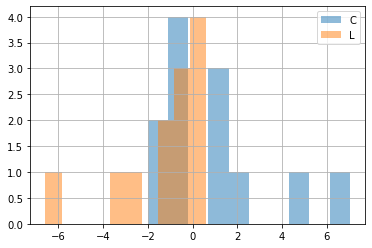

In [96]:
user_info.groupby('party').model_embed.hist(alpha=0.5, legend=True)
plt.legend()

Comparison to other characteristics 

<AxesSubplot:xlabel='model_embed', ylabel='extraversion_num'>

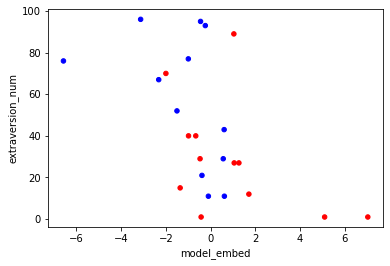

In [104]:
user_info.plot.scatter(x='model_embed', y='extraversion_num', color=['blue' if x=='L' else 'red' for x in user_info.party])

<AxesSubplot:xlabel='model_embed', ylabel='openness_num'>

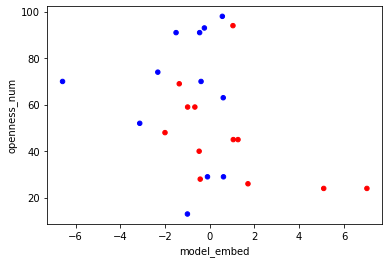

In [106]:
user_info.plot.scatter(x='model_embed', y='openness_num', color=['blue' if x=='L' else 'red' for x in user_info.party])